# Text Summarizer

## Import Module

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install rouge

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=e335d88b2a0de16f5eaf4c7e1437689dbccfa4b3eb5e95556434630b018697dc
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
!pip install git+https://github.com/keras-team/keras-nlp.git
#!pip install tensorflow-datasets

  Cloning https://github.com/keras-team/keras-nlp.git to /tmp/pip-req-build-gc9g1ft6
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-nlp.git /tmp/pip-req-build-gc9g1ft6
  Resolved https://github.com/keras-team/keras-nlp.git to commit 294304b94f8ab9355beeeae6965e26f6c4fc9286
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.6 MB/s

In [ ]:
import pandas as pd
from rouge import Rouge
from rouge_score import rouge_scorer

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

In [ ]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("Default GPU Device: {}".format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [ ]:
import time
import keras_nlp
import tensorflow as tf
#import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping

import time

## Define Training Variables

In [ ]:
BATCH_SIZE = 8
NUM_BATCHES = 50
EPOCHS = 10
MAX_ENCODER_SEQUENCE_LENGTH = 1024
MAX_DECODER_SEQUENCE_LENGTH = 256

## Collecting Data

In [ ]:
from datasets import load_dataset

dataset_dict = load_dataset("multi_news")

train_dataset = dataset_dict['train']
validation_dataset = dataset_dict['validation']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/44972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5622 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5622 [00:00<?, ? examples/s]

In [ ]:
def check_len_every_split(dataset_dict):
    for split in ['train', 'validation', 'test']:
        print(f"Number of rows in {split} dataset: {len(dataset_dict[split])}")

In [ ]:
check_len_every_split(dataset_dict)

Number of rows in train dataset: 44972
Number of rows in validation dataset: 5622
Number of rows in test dataset: 5622


In [ ]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 44972
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
    test: Dataset({
        features: ['document', 'summary'],
        num_rows: 5622
    })
})

In [ ]:
dataset_dict = load_dataset("multi_news")

## Data Preprocessing

Delete rows that have a summary longer than the document

In [ ]:
for split in ['train', 'validation', 'test']:
    dataset = dataset_dict[split]
    dataset = dataset.map(lambda example: {'document': example['document'], 'summary': example['summary'].strip("–").strip()})
    dataset = dataset.filter(lambda example: len(example['summary']) <= len(example['document']))
#     dataset = dataset.filter(lambda example: len(example['document']) <= MAX_DECODER_SEQUENCE_LENGTH)
#     dataset = dataset.filter(lambda example: len(example['summary']) <= MAX_ENCODER_SEQUENCE_LENGTH)
    dataset_dict[split] = dataset


Map:   0%|          | 0/44972 [00:00<?, ? examples/s]

Filter:   0%|          | 0/44972 [00:00<?, ? examples/s]

Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5622 [00:00<?, ? examples/s]

Map:   0%|          | 0/5622 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5622 [00:00<?, ? examples/s]

In [ ]:
check_len_every_split(dataset_dict)

Number of rows in train dataset: 44556
Number of rows in validation dataset: 5574
Number of rows in test dataset: 5564


In [ ]:
dataset_dict['train']['summary'][:2]

['The unemployment rate dropped to 8.2% last month, but the economy only added 120,000 jobs, when 203,000 new jobs had been predicted, according to today\'s jobs report. Reaction on the Wall Street Journal\'s MarketBeat Blog was swift: "Woah!!! Bad number." The unemployment rate, however, is better news; it had been expected to hold steady at 8.3%. But the AP notes that the dip is mostly due to more Americans giving up on seeking employment.',
 'Shelly Sterling plans "eventually" to divorce her estranged husband Donald, she tells Barbara Walters at ABC News. As for her stake in the Los Angeles Clippers, she plans to keep it, the AP notes. Sterling says she would "absolutely" fight any NBA decision to force her to sell the team. The team is her "legacy" to her family, she says. "To be honest with you, I\'m wondering if a wife of one of the owners … said those racial slurs, would they oust the husband? Or would they leave the husband in?"']

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices({
    "encoder_text":dataset_dict['train']['document'],
    "decoder_text":dataset_dict['train']['summary'],
})
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.take(NUM_BATCHES)

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices({
    "encoder_text":dataset_dict['validation']['document'],
    "decoder_text":dataset_dict['validation']['summary'],
})
val_ds = val_ds.batch(BATCH_SIZE)
val_ds = val_ds.take(NUM_BATCHES)

## Creating Model

Creating model using Keras-NLP + Tensorflow Keras Utility

In [ ]:
preprocessor = keras_nlp.models.BartSeq2SeqLMPreprocessor(
    tokenizer=keras_nlp.models.BartTokenizer.from_preset("bart_large_en_cnn"),
    encoder_sequence_length=MAX_ENCODER_SEQUENCE_LENGTH,
    decoder_sequence_length=MAX_DECODER_SEQUENCE_LENGTH,
)

Attaching 'metadata.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'metadata.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/merges.txt' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...


In [ ]:
bart_lm = keras_nlp.models.BartSeq2SeqLM(
    backbone = keras_nlp.models.BartBackbone.from_preset("bart_large_en_cnn"),
    preprocessor=preprocessor,
)

bart_lm.summary()

Attaching 'metadata.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'metadata.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/bart/keras/bart_large_en_cnn/2' to your Kaggle notebook...


Preprocessor: "bart_seq2_seq_lm_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bart_tokenizer (BartTokenizer)                     │                                              50,265 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "bart_seq2_seq_lm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                  ┃ Output Shape                           ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_padding_mask (InputLayer)             │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ decoder_token_ids (InputLayer)                │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ encoder_padding_mask (InputLayer)             │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ encoder_token_ids (InputLayer)                │ (None, None)                           │               0 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ bart_backbone (BartBackbone)                  │ {encoder_sequence_output: (None, None, │     406,286,336 │
│                                               │ 1024), decoder_sequence_output: (None, │                 │
│                                               │ None, 1024)}                           │                 │
├───────────────────────────────────────────────┼────────────────────────────────────────┼─────────────────┤
│ token_embedding (ReversibleEmbedding)         │ (None, None, 50264)                    │      51,470,336 │
└───────────────────────────────────────────────┴────────────────────────────────────────┴─────────────────┘

 Total params: 406,286,336 (1.51 GB)

 Trainable params: 406,286,336 (1.51 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.AdamW(
    learning_rate=5e-5,
    weight_decay=0.01,
    epsilon=1e-6,
    global_clipnorm=1.0,
)

optimizer.exclude_from_weight_decay(var_names=["bias"])
optimizer.exclude_from_weight_decay(var_names=["gamma"])
optimizer.exclude_from_weight_decay(var_names=["beta"])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

bart_lm.compile(
    optimizer=optimizer,
    loss=loss,
    weighted_metrics=["accuracy"],
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
bart_lm.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

Epoch 1/10



I0000 00:00:1715177964.524744    9643 service.cc:145] XLA service 0x7f126c0400a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:

I0000 00:00:1715177964.524819    9643 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB MIG 7g.40gb, Compute Capability 8.0

2024-05-08 21:19:27.103587: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.

W0000 00:00:1715177970.706905    9643 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert

2024-05-08 21:19:36.820027: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


I0000 00:00:1715178075.666352    9762 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_289', 24 bytes spill stores, 24 bytes spill loads

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.4865 - loss: 2.2594

W0000 00:00:1715178302.055912    9648 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


50/50 ━━━━━━━━━━━━━━━━━━━━ 412s 762ms/step - accuracy: 0.4868 - loss: 2.2574 - val_accuracy: 0.5168 - val_loss: 2.0858

Epoch 2/10

50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 569ms/step - accuracy: 0.5760 - loss: 1.7116 - val_accuracy: 0.5122 - val_loss: 2.1271

Epoch 3/10

50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 571ms/step - accuracy: 0.6440 - loss: 1.3491 - val_accuracy: 0.5041 - val_loss: 2.2663

Epoch 4/10

50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 570ms/step - accuracy: 0.7051 - loss: 1.0527 - val_accuracy: 0.4910 - val_loss: 2.5058

Epoch 5/10

50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 597ms/step - accuracy: 0.7595 - loss: 0.8171 - val_accuracy: 0.4903 - val_loss: 2.7663

Epoch 6/10

50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 574ms/step - accuracy: 0.8056 - loss: 0.6320 - val_accuracy: 0.4936 - val_loss: 2.9751


In [ ]:
def generate_text(model, input_text, max_length=200, print_time_taken=False):
    start = time.time()
    output = model.generate(input_text, max_length=max_length)
    end = time.time()
    print(f"Total Time Elapsed: {end - start:.2f}s")
    return output

### Test Random Document to Summarize

In [ ]:
text = '''

Creatures of the Night is the tenth studio album by American rock band Kiss, released in 1982. It was the band's last for Casablanca Records, the only label for which
Kiss had recorded up to that point. The album was dedicated to the memory of Casablanca founder and early Kiss supporter Neil Bogart, who had died of cancer during the recording sessions. It is also the band's last album recorded with Ace Frehley credited as an official member and their first album with Vinnie Vincent, as the initially uncredited lead guitarist. Vincent would later be credited but not featured on the cover of the 1985 reissue of the album. It was also Kiss' last album to feature
the band with their trademark makeup until the release of Psycho Circus in 1998.


== Background ==
By 1982, Kiss's popularity in the US had plummeted due to changing musical tastes and their move away from the anthemic hard rock of their earlier material. 1979's Dynasty, while commercially successful, alienated many fans with the disco-flavored track "I Was Made for Lovin' You." 1980's Unmasked fell further into a pop rock/power
pop oriented sound and was Kiss's first album not to achieve platinum status since 1975's Dressed to Kill. The band did not even tour the US for Unmasked, and it also
soon faced its first lineup change: founding member Peter Criss, who had not participated in any of the Unmasked recording sessions, officially left Kiss in 1980 and was replaced by Eric Carr.
Fan hopes were raised in 1980 when Kiss announced that they were going to record their heaviest record yet. Instead, the band released Music from "The Elder" in late 1981, a concept album originally intended to complement a film called The Elder that was ultimately never filmed. Despite confidence from producer Bob Ezrin that this would recreate the success from 1976's Destroyer, the album did not improve the band's status, and on the contrary, further diminished Kiss' US fanbase, failed to achieve gold status, and having cancelled their US Unmasked Tour just a short time before, the band then called off the planned tour for Music from "The Elder."
Kiss's label situation had changed as well. Casablanca Records founder Neil Bogart had sold the label to its distributor PolyGram in 1980, and went on to briefly form
Boardwalk Records before being diagnosed with and later succumbing to cancer. Using a clause in their Casablanca contract that gave the band an option to leave the label if Bogart did, Kiss became free agents and signed a multimillion-dollar deal with Mercury Records. Mercury, a label also owned by PolyGram, reverted the band to their "old" label, though in name only.


== Composition and recording ==
The album represented a conscious effort by Kiss to return to the hard rock style that had helped them achieve commercial success with Destroyer (1976) and Love Gun (1977). The first key ingredient was songwriter/guitarist Vinnie Vincent, who was soon to replace Frehley as the band's new lead guitarist after being introduced to the
band by album co-writer Adam Mitchell.
Musically, the progressive elements of Music from "The Elder" and the pop affectations of Dynasty and Unmasked were completely absent from Creatures of the Night, making it the heaviest album the group had made at that point. Paul Stanley called Kiss "a heavy metal band" in 1982. "I Still Love You", the only ballad on Creatures of the Night, was still heavier and darker than any ballad Kiss had released in earlier years. Also contributing to the heavy sound was Carr's drumming style, which was more similar to John Bonham's drumming than to Criss' jazz-influenced style. Creatures of the Night is the first Kiss album to have all lead vocal duties handled by either Gene Simmons or Stanley exclusively. All previous studio releases by the group contained at least one song with lead vocals by another band member.
The song "Rock and Roll Hell" is a rewrite of the song of the same title on the 1979 album Rock n' Roll Nights by Canadian band Bachman–Turner Overdrive, where the original version of this Simmons/Adams/Vallance song credited to Jim Vallance only.
Kiss had used "ghost players" on previous albums, most notably Bob Kulick (Alive II and Killers) and Dick Wagner (Destroyer), but Vincent handled most of the lead guitar as a session player and co-writer before being added as the full-time replacement for Frehley, though as an employee and not a full member (like Carr). Blues guitarist Robben Ford, a friend of the album's producer Michael James Jackson, contributed two solos in what he described as one of his weirdest gigs. Mr. Mister guitarist Steve Farris (who was considered as a replacement for Frehley but was thought to not have "the right look") provided the solo and lead fills to the title track. Co-writer Mitchell also contributed guitar work to the title track. Though often given credit for playing the solos on "Keep Me Comin'" and "Danger", Kulick admitted in a 2011 interview that none of the studio work he did on Creatures of the Night made it to the album; this confirmed the same from an earlier Mitchell interview. Jimmy Haslip (former member of Blackjack), Tommy Bolin Band and Street Punk declared in 2008 that he was invited by James Jackson to record five songs (Simmons allegedly refused
to play his bass parts due to the end of his relationship with Diana Ross), but Haslip only confirmed that he recorded "Danger."
Though Ace Frehley did not play on the album, his face was still featured on the album cover for contractual and commercial reasons. Frehley had been pushing the band
to do a heavy rock record since Dynasty, and by the time of Creatures of the Night, he was fully disillusioned with the band; alcoholism and a prescription medicine dependency (begun after a car wreck) led to him not participating in the recording sessions. In fact, when recording sessions for Creatures of the Night began in July 1982, Kiss was essentially a trio. It was only after the album was released and a short promotional tour of Europe was completed that Frehley officially left Kiss. The lead guitar replacement for Frehley for the Creatures of the Night Tour/10th Anniversary Tour in the U.S. was Vincent, adopting his Egyptian Ankh makeup, hastily designed by Stanley.
Speaking to Record Mirror in 1982, Stanley explained the album title as "Basically, we feel that everybody is a creature of the night. We're all less inhibited and we're all vampires. The night makes people feel free and then by the cold light of dawn we crawl home to our coffins to behave like normal people during the day."


== Artwork ==
It has been speculated that the original 1982 cover was modeled after the 1979 children's book, I Can Read About Creatures of the Night. In the early days of KISS 1972-73, there was a band on the same New York circuit by the name of "Creatures of the Dark" the members dressed as characters from the Universal Monster Film Series; Dracula, Wolfman, Frankenstein's Monster and the Mummy.
Three official variations on the album artwork exist: the 1982 original issue; the 1985 reissue, featuring Stanley, Carr, Gene Simmons, and then-current guitarist Bruce Kulick—who did not play on the album—all without make-up; and the 1997 remastered version (same photo as the original, but with minor variations in the logo and lettering). There is also a bootlegged LP that claims to be a Brazilian promo version that features Vincent in make-up airbrushed over Frehley.


== Promotion ==
The band released a video for "I Love It Loud," which received moderate airplay on MTV. In it was a stage set up that featured Carr's drum kit as a giant metallic tank with an exploding turret. Flames and explosions were also in abundance. Frehley did appear in the video as the rhythm guitarist, with Stanley shown playing the seven-note solo.
The album is the band's most represented of their 1980s material over the course of their career in their live setlists by a wide margin and it is their fourth most represented album overall. "I Love It Loud" is a setlist staple performed at nearly all of their shows, with over 1500 performances, and "War Machine" has also been played on most of their tours, having been performed over 900 times. In addition, the album's title track and "I Still Love You" have both been performed over 300 times each.


== Reception ==

Despite positive reviews, the album did not return the band to the commercial success they had held five years prior. Despite charting higher than The Elder (No. 45, compared to The Elder's No. 75), Creatures of the Night would not attain gold status until 1994. The album would receive critical recognition. In 2022, Creatures of the Night was named No. 4 of 'The 25 greatest rock guitar albums of 1982' list in Guitar World.
Carr noted in an interview that Creatures of the Night was his favorite Kiss record on which he played.
Creatures of the Night was certified gold by the RIAA on May 9, 1994. It was certified gold in Brazil in 1983 for sales of 100,000 copies.
In 2022, a super deluxe edition of the album was released in multiple configurations on CD, vinyl and streaming. The most extensive, a five CD + Blu-ray audio disc, features a total of 103 songs including a new remastered version of the album, 2 discs of demos and studio outtakes (including all 4 new songs from Killers and 3 unreleased songs from the Elder-era Penny Lane session), and 2 discs of live soundboard recordings from the 1982-83 tour for the album. The first single from this re-release
was the song Betrayed, a re-working of a Vinnie Vincent demo from his earlier band Warrior with new lyrics and vocals by Paul Stanley.


== Track listing ==
All credits adapted from the original release.

On the 1985 non-make-up release, the song "Creatures of the Night" is remixed, and "Saint and Sinner" and "Killer" are interchanged from side to side with each other.
Also, for the 1985 reissue, engineer Dave Wittman remixed three tracks: "Creatures of the Night", "I Love It Loud" and "War Machine".


== Personnel ==


== Charts ==


== Certifications and sales ==


== Release history ==
Casablanca NBLP-7270: LP
Casablanca NBLS-7270: Cassette
Casablanca NBL8-7270: 8-track


== References ==


== External links ==
Creatures of the Night at Discogs (list of releases)

'''.strip()

generated_summary = generate_text(
    bart_lm,
    text,
    max_length=512,
    print_time_taken=True,
)
print(generated_summary)

Total Time Elapsed: 1.56s
Creatures of the Night is the 10th album by American band Kiss. The album was released in 1982, and was the first Kiss album with guitarist Vinnie Vincent credited. The band was on the verge of releasing their heaviest album yet when they cancelled the tour for Music from "The Elder" The album was dedicated to Kiss label founder Neil Bogart, who had died of cancer during the recording sessions.


In [ ]:
index_to_test = 100

In [ ]:
text = dataset_dict['test']['document'][index_to_test]

generated_summary = generate_text(
    bart_lm,
    text,
    max_length=256,
    print_time_taken=True,
)

W0000 00:00:1715248860.765869      35 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Total Time Elapsed: 26.96s


In [ ]:
print(generated_summary)

Six women from Australia wear identical dresses to same wedding reception. Photo of group of women has been shared 42,000 times on Facebook. Debbie Speranza posted a photo and joked that they were "backup bridesmaids" Debbie said the women had been 'in the same dress' for three weeks. The women were in Sydney for a wedding of Julia Mammone in Sydney.


In [ ]:
real_summary = dataset_dict['test']['summary'][index_to_test]

In [ ]:
print(real_summary)

Debbie Speranza was surprised when she met up with her cousin at a Sydney wedding reception recently and they were wearing the same dress. But both women were even more surprised when they kept bumping into other women also in the same dress—a total of six women at the Australian wedding, which was attended by about 200 people total, showed up in the A$160 (about $128 USD) dress from Forever New. "No we are NOT the bridesmaids just the guests," Speranza wrote on the brand's Facebook page alongside a picture of the six women with the bride, Julia Mammone. She did dub the group #backupbridesmaids when the post went viral on social media, the BBC reports. "Then another walked in … then another one … and another one," Speranza tells the Telegraph. "A couple of the women were a little bit 'ahhhhh' but then we all saw the fun in it." She adds, "It wasn't a setup, I swear. I only knew one of the six women. Three were from the bride's side and three from the groom." The six women and Mammone a

In [ ]:
rouge = Rouge()
scores = rouge.get_scores(generated_summary, real_summary)[0]
rouge_score = scores['rouge-1']
print(rouge_score)

{'r': 0.1796875, 'p': 0.5, 'f': 0.2643678122024046}


In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL', 'rouge2'], use_stemmer=True)
scores = scorer.score(real_summary, generated_summary)
rouge_scores = scores
print(rouge_scores)

{'rouge1': Score(precision=0.6612903225806451, recall=0.20398009950248755, fmeasure=0.31178707224334595), 'rougeL': Score(precision=0.3064516129032258, recall=0.0945273631840796, fmeasure=0.1444866920152091), 'rouge2': Score(precision=0.16393442622950818, recall=0.05, fmeasure=0.07662835249042146)}


## Model Evaluation

Model Evaluation using Rouge Metrics.

Skor ROUGE mengukur kualitas ringkasan otomatis dengan membandingkannya dengan satu atau lebih ringkasan yang dibuat manusia (ringkasan referensi). Skor ini berfokus pada tiga aspek utama: *precision*, *recall*, dan skor *F1*. Masing-masing dari metrik ini memiliki range nilai dari 0 hingga 1, di mana 0 menunjukkan tidak ada kesamaan dan 1 menunjukkan kesamaan yang sempurna. Berikut penjelasan lebih rinci tentang ketiga aspek tersebut:

1. **Recall (R)**: Recall mengukur proporsi kata-kata dalam ringkasan referensi yang juga muncul dalam ringkasan yang dihasilkan. Nilai ini menunjukkan seberapa lengkap ringkasan yang dihasilkan dalam menangkap informasi penting dari teks sumber. Recall dihitung dengan formula:
   
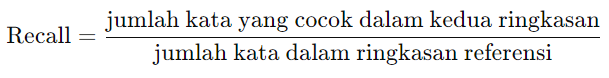

2. **Precision (P)**: Precision mengukur proporsi kata-kata dalam ringkasan yang dihasilkan yang juga muncul dalam ringkasan referensi. Nilai ini menunjukkan seberapa akurat atau relevan kata-kata dalam ringkasan yang dihasilkan terhadap teks referensi. Precision dihitung dengan formula:
   
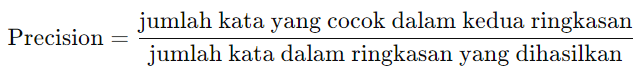

3. **F1-Score (F1)**: F1-Score adalah rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya. Ini adalah ukuran yang umum digunakan ketika Anda ingin memperhitungkan baik keakuratan maupun kelengkapan dari ringkasan yang dihasilkan. F1 dihitung dengan formula:
   
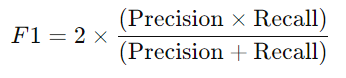

Nilai-nilai dari skor ROUGE dapat bervariasi tergantung pada kekhasan dan kesulitan teks yang diringkas serta kualitas ringkasan referensi yang digunakan sebagai standar perbandingan. Skor yang lebih tinggi menunjukkan bahwa ringkasan yang dihasilkan lebih dekat dengan kualitas dan isi dari ringkasan referensi, sehingga idealnya mencerminkan hasil yang lebih baik dalam proses summarization.

In [ ]:
test_data = dataset_dict['test']
results = []

In [ ]:
import math

total_documents = len(test_data['document'])
batch_size = math.ceil(total_documents / 5)

for i in range(0, total_documents, batch_size):
    print(f"[{i}:{i+batch_size}]")

[0:1113]
[1113:2226]
[2226:3339]
[3339:4452]
[4452:5565]


In [ ]:
def calculate_rouge_score_testdata(from_inclusive, to_exclusive):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL', 'rouge2'], use_stemmer=True)

    for index in range(from_inclusive, to_exclusive): #len(test_data['document'])
        text = test_data['document'][index]
        real_summary = test_data['summary'][index]

        generated_summary = generate_text(
            bart_lm,
            text,
            max_length=256,
            print_time_taken=True,
        )

        scores = scorer.score(real_summary, generated_summary)
        rouge_scores = scores

        temp_dict = {
            'id': index,
            'rouge1_f1': rouge_scores['rouge1'].fmeasure,
            'rouge2_f1': rouge_scores['rouge2'].fmeasure,
            'rougeL_f1': rouge_scores['rougeL'].fmeasure,
        }
        print(temp_dict)
        results.append(temp_dict)

    df = pd.DataFrame(results)
    average_rouge1_f1 = df['rouge1_f1'].mean()
    average_rouge2_f1 = df['rouge2_f1'].mean()
    average_rougeL_f1 = df['rougeL_f1'].mean()
    print("Average rouge1_f1 Score:", average_rouge1_f1)
    print("Average rouge2_f1 Score:", average_rouge2_f1)
    print("Average rougeL_f1 Score:", average_rougeL_f1)

    return df

In [ ]:
# [0:1113]
# [1113:2226]
# [2226:3339]
# [3339:4452]
# [4452:5565]

In [ ]:
df = calculate_rouge_score_testdata(0, 1113)
df.tail()

Total Time Elapsed: 54.10s
{'id': 0, 'rouge1_f1': 0.49865951742627346, 'rouge2_f1': 0.1347708894878706, 'rougeL_f1': 0.21447721179624665}
Total Time Elapsed: 2.42s
{'id': 1, 'rouge1_f1': 0.4576271186440678, 'rouge2_f1': 0.10227272727272729, 'rougeL_f1': 0.20338983050847456}
Total Time Elapsed: 2.63s
{'id': 2, 'rouge1_f1': 0.4709141274238227, 'rouge2_f1': 0.1615598885793872, 'rougeL_f1': 0.22160664819944598}
Total Time Elapsed: 2.79s
{'id': 3, 'rouge1_f1': 0.38387715930902105, 'rouge2_f1': 0.034682080924855495, 'rougeL_f1': 0.1727447216890595}
Total Time Elapsed: 2.68s
{'id': 4, 'rouge1_f1': 0.4237918215613384, 'rouge2_f1': 0.07462686567164178, 'rougeL_f1': 0.17100371747211895}
Total Time Elapsed: 2.91s
{'id': 5, 'rouge1_f1': 0.4755555555555555, 'rouge2_f1': 0.15625000000000003, 'rougeL_f1': 0.2}
Total Time Elapsed: 2.62s
{'id': 6, 'rouge1_f1': 0.35678391959799, 'rouge2_f1': 0.07575757575757576, 'rougeL_f1': 0.1658291457286432}
Total Time Elapsed: 3.17s
{'id': 7, 'rouge1_f1': 0.55660377

,id,rouge1_f1,rouge2_f1,rougeL_f1
1108,1108,0.529293,0.190669,0.210101
1109,1109,0.518950,0.246334,0.303207
1110,1110,0.465011,0.208617,0.257336
1111,1111,0.350711,0.109524,0.199052
1112,1112,0.454023,0.121387,0.201149


## Model Deployment

SAVE MODEL TO ".KERAS" (INCLUDE weight.h5 + tokenizer.json)

Pada tahap ini, rencana deployment dilakukan langsung dari Google Cloud. Jadi, GCP akan me load model keras, lalu dijalankan menggunakan API. Nantinya, Web Frontend dan Mobile bisa memanggil API dan mendapatkan hasil summarynya.

In [ ]:
bart_lm.save('./bart-multinews.keras')

In [ ]:
import os
import tensorflow as tf

# URL model
url = "{website-url-that-hold-the-model}/bart-multinews.keras"

# Tempat penyimpanan lokal
local_path = "bart-multinews.keras"

# Mengunduh file model
os.system(f"wget {url} -O {local_path}")

0

In [ ]:
reconstructed_model = tf.keras.models.load_model(
    local_path,
    #custom_objects={"BartSeq2SeqLM": keras_nlp.models.BartSeq2SeqLM}
)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 1024 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
bart_lm = reconstructed_model

In [ ]:
text = dataset_dict['test']['document'][123]

generated_summaries = generate_text(
    reconstructed_model,
    text,
    max_length=256,
    print_time_taken=True,
)

Total Time Elapsed: 15.46s


In [ ]:
print(generated_summaries)

A new version of the Islamic Republic's Penal Code of Iran has been translated in English, the first in decades. It's been made available to all Iranians. Book Five, which deals with ta'zir crimes, criminal threats, crimes, theft, and forgery, has been adopted permanently and isn't subject to experimental periods. The Iranian Human Rights Documentation Center, the group behind the book, says it's a good first step to getting people to understand Iran. "The new version is very clear about the seriousness of some of the offenses, including those that have been made illegal, and that can be easily avoided,” the center writes. “The new version also provides a very clear understanding of what the Islamic Republic's law is."


In [ ]:
!nvidia-smi

Wed May  8 21:40:31 2024       

+-----------------------------------------------------------------------------+

| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.1     |

|-------------------------------+----------------------+----------------------+

| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |

| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |

|                               |                      |               MIG M. |

|===============================+======================+======================|

|   0  NVIDIA A100-SXM...  On   | 00000000:47:00.0 Off |                   On |

| N/A   31C    P0    65W / 400W |                  N/A |     N/A      Default |

|                               |                      |              Enabled |

+-------------------------------+----------------------+----------------------+



+-------------------------------------------------------------------------